In [2]:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
         

from sklearn.model_selection import learning_curve

In [3]:
df = pd.read_csv("data/malicious_01.csv")
X = df.drop(columns=["INCIDENT_ID","DATE", "MALICIOUS_OFFENSE"])
y = df["MALICIOUS_OFFENSE"]
X['X_12'] = np.nan_to_num(X['X_12'])
X, y = X.values, y.values

X.shape[0] * 0.8

19084.8

In [4]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [5]:
 def confusion_matrix_scorer(clf, X, y):
        y_pred = clf.predict(X)
        cm = confusion_matrix(y, y_pred)
        positives_total = cm[0].sum()
        return cm[0,0]/positives_total
        
#         return {'tn': cm[0, 0], 'fp': cm[0, 1],
#               'fn': cm[1, 0], 'tp': cm[1, 1]}

In [6]:
# train_sizes = [1, 2000, 4000, 6000, 8000, 10000, 12000, 14000,  16000, 19084]

train_sizes = np.linspace(0.1,1,8)

strat_cv = StratifiedKFold(5, shuffle=True,  random_state=0)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = DecisionTreeClassifier(max_depth=15),
X =X,
y =y , train_sizes = train_sizes, cv = strat_cv,
scoring = confusion_matrix_scorer)

# make_scorer(f1_score, pos_label=0)
train_sizes

array([ 1908,  4362,  6815,  9269, 11723, 14176, 16630, 19084])

In [10]:
def play(name='free', name2='feel'):
    print(f"{name}, {name2}")
    
play({'name':'one', 'name2':'two'})

{'name': 'one', 'name2': 'two'}, feel


In [12]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

 ----------------------------------------------------------------------

Validation scores:

 [[0.87383178 0.87850467 0.88785047 0.81690141 0.66666667]
 [0.91121495 0.89719626 0.93457944 0.87793427 0.88732394]
 [0.97196262 0.94859813 0.96261682 0.95774648 0.92957746]
 [0.96728972 0.96261682 0.94859813 0.94366197 0.95774648]
 [0.98130841 0.96728972 0.96728972 0.9342723  0.96713615]
 [0.98598131 0.97663551 0.97663551 0.95774648 0.96244131]
 [0.98130841 0.97196262 0.97196262 0.99061033 0.97183099]
 [0.9953271  0.97663551 0.96728972 0.97183099 0.99061033]]


In [13]:

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1908     1.0
4362     1.0
6815     1.0
9269     1.0
11723    1.0
14176    1.0
16630    1.0
19084    1.0
dtype: float64

 --------------------

Mean validation scores

 1908     0.824751
4362     0.901650
6815     0.954100
9269     0.955983
11723    0.963459
14176    0.971888
16630    0.977535
19084    0.980339
dtype: float64


(0.0, 1.2)

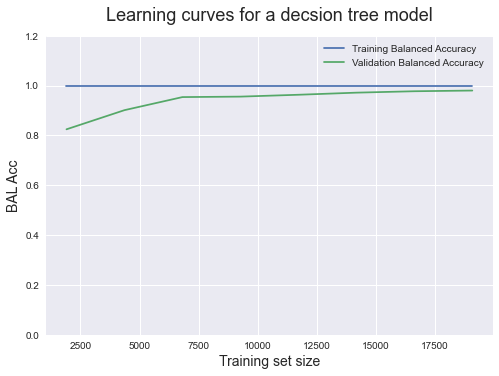

In [14]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training Balanced Accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation Balanced Accuracy')
plt.ylabel('BAL Acc', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decsion tree model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.2)